In [1]:
# import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
bist = pd.read_csv('XU100_BIST.csv', index_col=0, parse_dates=True) #Get BIST STOCK PRICE

In [3]:
bist.dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-12,16347.400391,17304.199219,16347.400391,16933.599609,16933.599609,5.969170e+07
2000-01-13,16933.599609,18256.800781,16933.599609,18138.199219,18138.199219,7.364170e+07
2000-01-14,18138.199219,19332.099609,18138.199219,19110.300781,19110.300781,6.785520e+07
2000-01-17,19110.300781,20617.900391,18301.300781,18458.300781,18458.300781,7.324420e+07
2000-01-18,18458.300781,19577.300781,18182.500000,19577.300781,19577.300781,5.954870e+07
...,...,...,...,...,...,...
2022-10-05,3486.699951,3508.500000,3425.399902,3484.399902,3484.399902,4.626678e+09
2022-10-06,3519.899902,3565.500000,3507.800049,3553.899902,3553.899902,4.330069e+09
2022-10-07,3563.899902,3589.199951,3546.100098,3567.600098,3567.600098,3.741658e+09


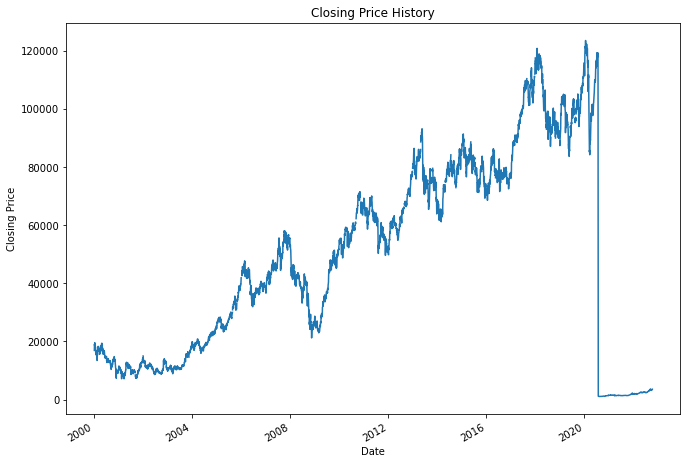

In [4]:
plt.figure(figsize=(11, 8)) # resizing the plot
bist['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

<Figure size 1152x576 with 0 Axes>

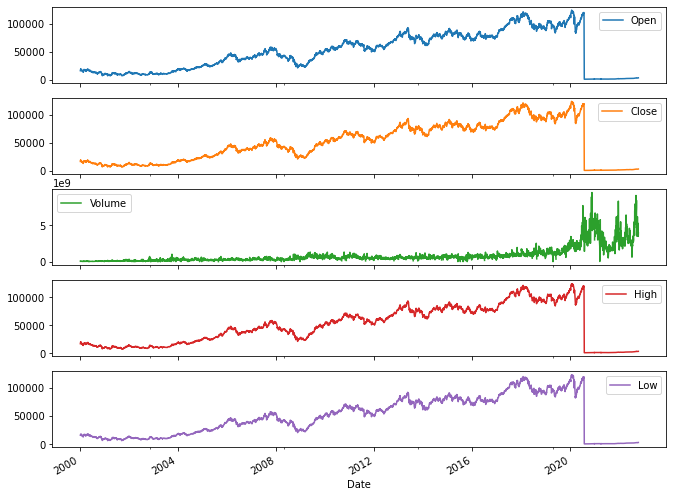

In [5]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = bist[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

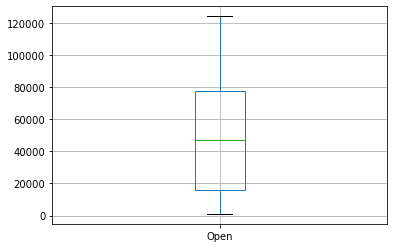

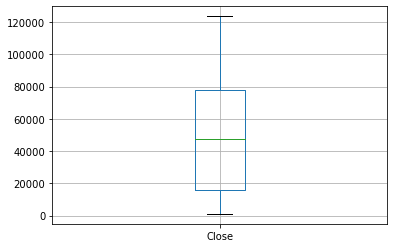

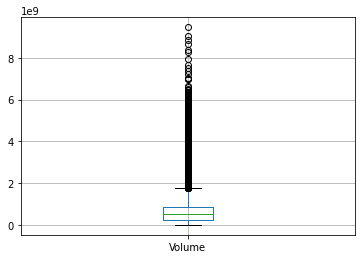

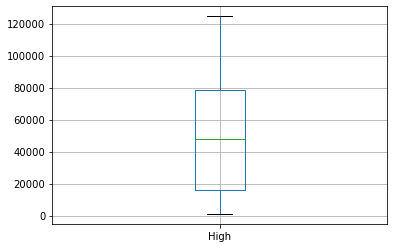

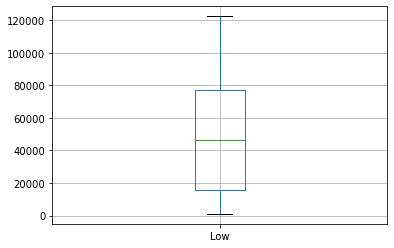

In [6]:
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
for i in cols:
    plt.subplots()
    axes = bist.boxplot(column= [i])
plt.show()

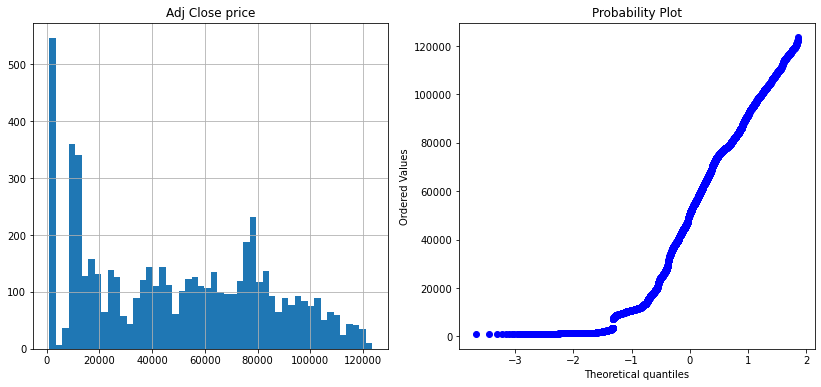

In [8]:
import scipy.stats as stats
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
bist['Adj Close'].hist(bins=50)
plt.title('Adj Close price')
plt.subplot(1,2,2)
stats.probplot(bist['Adj Close'], plot=plt);

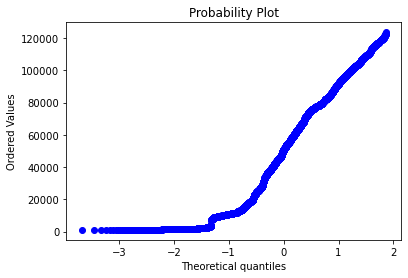

In [7]:
import scipy.stats as stats
a = bist['Close']
stats.probplot(a, dist="norm", plot=plt);
plt.show()

In [22]:
returns = bist/bist.shift(1)
returns = returns.dropna()
skewness = returns.skew()
skewness

Open        -11.569080
High        -16.949248
Low         -13.945126
Close       -12.339705
Adj Close   -12.339705
Volume             NaN
dtype: float64

In [23]:
kurtosis = returns.kurtosis()
kurtosis

Open         466.493934
High         778.917355
Low          593.342343
Close        514.200430
Adj Close    514.200430
Volume              NaN
dtype: float64

In [24]:
bist.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5694.000000,5694.000000,5694.000000,5694.000000,5694.000000,5.694000e+03
mean,49358.610034,49797.399749,48846.178849,49324.034122,49324.034122,8.510729e+08
std,34045.819549,34249.167542,33787.068280,33995.834255,33995.834255,1.105356e+09
min,1030.300049,1062.099976,985.400024,1034.400024,1034.400024,0.000000e+00
25%,15822.249756,16168.999756,15460.899658,15822.249756,15822.249756,2.519486e+08
50%,47270.451172,47802.599610,46673.099610,47289.699219,47289.699219,5.125695e+08
75%,77712.425781,78199.773438,77155.447266,77594.578125,77594.578125,8.499106e+08
max,124215.898438,124536.601563,122368.703125,123556.101563,123556.101563,9.457914e+09


In [25]:
bist['Percentage Returns'] = bist['Adj Close'].pct_change()
bist.head()

,Open,High,Low,Close,Adj Close,Volume,Percentage Returns
Date,,,,,,,
2000-01-12,16347.400391,17304.199219,16347.400391,16933.599609,16933.599609,59691700.0,NaN
2000-01-13,16933.599609,18256.800781,16933.599609,18138.199219,18138.199219,73641700.0,0.071137
2000-01-14,18138.199219,19332.099609,18138.199219,19110.300781,19110.300781,67855200.0,0.053594
2000-01-17,19110.300781,20617.900391,18301.300781,18458.300781,18458.300781,73244200.0,-0.034118
2000-01-18,18458.300781,19577.300781,18182.500000,19577.300781,19577.300781,59548700.0,0.060623


<AxesSubplot:ylabel='Frequency'>

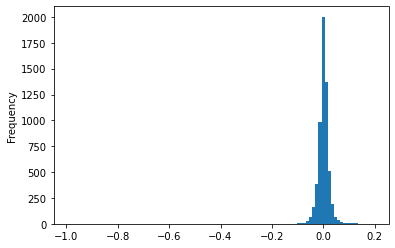

In [26]:
bist['Percentage Returns'].plot(kind='hist',bins=100)

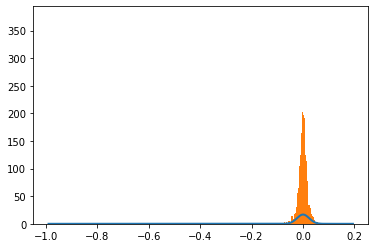

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(bist['Percentage Returns'].dropna())
h = sorted(h)
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2)
plt.hist(h, bins = 1000)      
plt.show() 

<AxesSubplot:title={'center':'Monthly returns'}, xlabel='Date'>

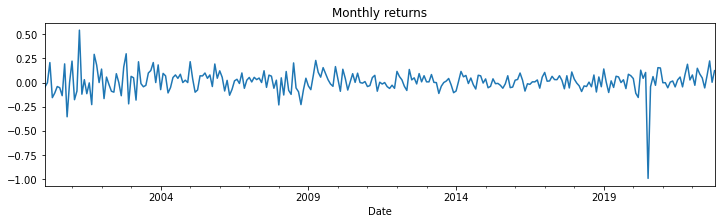

In [28]:
bist_monthly_returns = bist['Close'].resample('M').ffill().pct_change().dropna()
bist_monthly_returns.plot(title='Monthly returns', figsize=(12, 3)) #Plot the dataset

<AxesSubplot:title={'center':'weekly returns'}, xlabel='Date'>

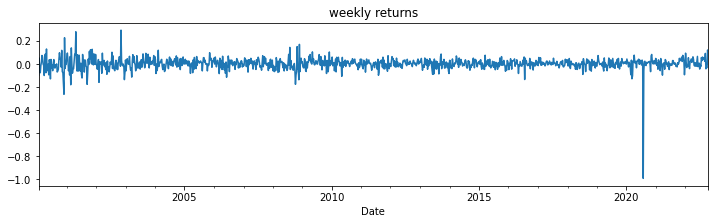

In [29]:
bist_weekly_returns = bist['Close'].resample('W').ffill().pct_change().dropna()
bist_weekly_returns.plot(title='weekly returns', figsize=(12, 3)) #Plot the dataset

In [30]:
bist['daily_returns']=(bist['Close'].pct_change())*100

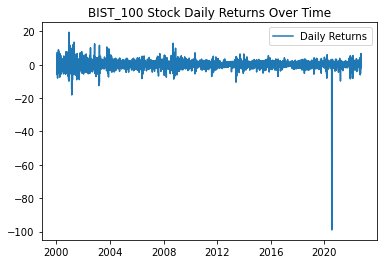

In [31]:
plt.plot(bist['daily_returns'], label = 'Daily Returns')
plt.legend(loc='best')
plt.title('BIST_100 Stock Daily Returns Over Time')
fig,figsize=(12, 3)
plt.show()

In [17]:
import math
daily_volatility_XU100 = bist['daily_returns'].std()
print('Daily volatility:')
print('bist: ', '{:.2f}%'.format(daily_volatility_XU100))
monthly_volatility_XU100 = math.sqrt(21) * daily_volatility_XU100
print('Monthly volatility:')
print ('bist: ', '{:.2f}%'.format(monthly_volatility_XU100))
annual_volatility_XU100 = math.sqrt(252) * daily_volatility_XU100
print('Annual volatility:')
print ('bist: ', '{:.2f}%'.format(annual_volatility_XU100 ))

Daily volatility:
bist:  2.38%
Monthly volatility:
bist:  10.89%
Annual volatility:
bist:  37.73%


In [18]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
adfuller(bist_weekly_returns.dropna())

(-34.104736607100726,
 0.0,
 0,
 1186,
 {'1%': -3.4358757250664356,
  '5%': -2.8639800492824805,
  '10%': -2.568069130240666},
 -3568.932812468758)

In [19]:
#Fit the model
mod_kns = sm.tsa.MarkovRegression(bist_weekly_returns.dropna(), k_regimes=3, trend='nc', switching_variance=True)
res_kns = mod_kns.fit()
res_kns.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1187
Model:               MarkovRegression   Log Likelihood                2133.660
Date:                Sun, 16 Oct 2022   AIC                          -4249.320
Time:                        22:19:04   BIC                          -4203.607
Sample:                    01-23-2000   HQIC                         -4232.091
                         - 10-16-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0009   9.17e-05     10.214      0.000       0.001       0.001
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0031      0.000      6.683      0.000       0.002       0.004
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1371      0.080      1.718      0.086      -0.019       0.294
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9831      0.009    115.043      0.000       0.966       1.000
p[1->0]        0.0303      0.019      1.631      0.103      -0.006       0.067
p[2->0]        0.0574      0.206      0.279      0.781      -0.346       0.461
p[0->1]        0.0156      0.009      1.835      0.067      -0.001       0.032
p[1->1]        0.9547      0.021     46.296      0.000       0.914       0.995
p[2->1]        0.6343      0.275      2.310      0.021       0.096       1.172
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

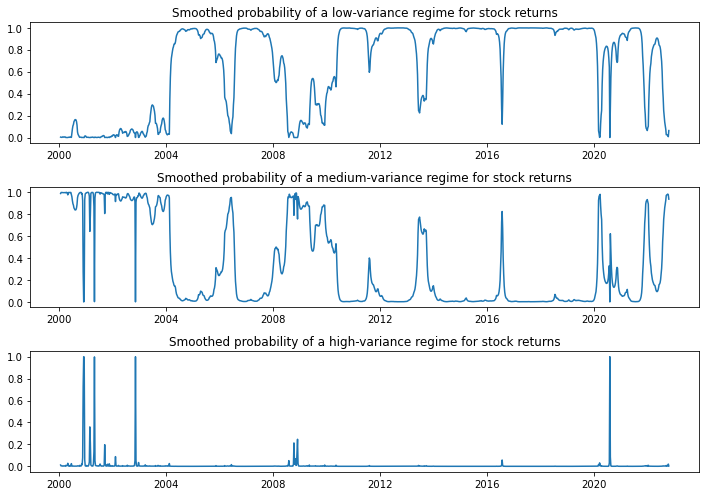

In [20]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, figsize=(10,7))
ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for stock returns')
ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for stock returns')
ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for stock returns')
fig.tight_layout()

In [21]:
print(res_kns.expected_durations)

[59.2471931  22.06537092  1.44590449]


In this case, it is expected that a recession will last about one year (4 quarters) and an expansion about two and a half years.